In [8]:
from __future__ import print_function
import datetime
from pandas_datareader import data, wb

import matplotlib.pyplot as plt
import pandas as pd
import requests

In [5]:
start_date = datetime.datetime(2007,1,1)
end_date = datetime.datetime(2015,6,15)
spy = data.DataReader("SPY", 'yahoo', start_date, end_date)
print(spy.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-06-10  209.369995  211.410004  209.300003  210.960007  200.395233   
2015-06-11  211.479996  212.089996  211.199997  211.649994  201.050659   
2015-06-12  210.639999  211.479996  209.679993  209.929993  199.416779   
2015-06-15  208.639999  209.449997  207.789993  209.100006  198.628357   
2015-06-16  208.929993  210.350006  208.720001  210.250000  199.720764   

               Volume  
Date                   
2015-06-10  134551300  
2015-06-11   73876400  
2015-06-12  135382400  
2015-06-15  124384200  
2015-06-16   85308200  


In [7]:
#Quandl
# https://www.quandl.com/collections/futures
# https://www.quandl.com/api/v3/datasets/CME/ESZ2014.csv?api_key=7Cd9BR7ja7xsEXy8axoy

In [14]:
def construct_futures_symbols(symbol, start_year=2010, end_year=2014):
    futures = []
    months = 'HMUZ'
    for y in range(start_year, end_year + 1):
        for m in months:
            futures.append("%s%s%s" % (symbol, m, y))
    return futures

In [15]:
def download_contract_from_quandl(contract, dl_dir):
    api_call = "https://www.quandl.com/api/v3/datasets/"
    api_call += "CME/%s.csv" % contract
    params = "?api_key=7Cd9BR7ja7xsEXy8axoy"
    full_url = "%s%s" % (api_call, params)
    data = requests.get(full_url).text

    fc = open('%s/%s.csv' % (dl_dir, contract), 'w')
    fc.write(data)
    fc.close()

In [16]:
def download_historical_contracts(symbol, dl_dir, start_year=2010, end_year=2014):
    contracts = construct_futures_symbols(symbol, start_year, end_year)
    for c in contracts:
        print("Downloading contract: %s" % c)
        download_contract_from_quandl(c, dl_dir)

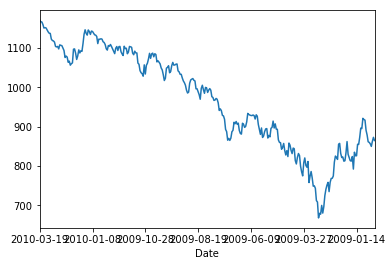

In [17]:
dl_dir = 'quandl/futures/ES'
symbol = 'ES'
# Create the start and end years
start_year = 2010
end_year = 2014

# Download the contracts into the directory
download_historical_contracts(symbol, dl_dir, start_year, end_year)

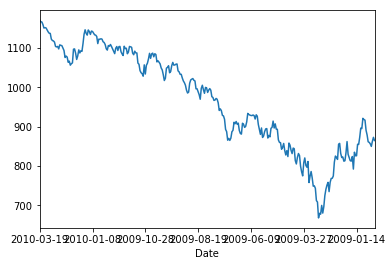

In [19]:
es = pd.io.parsers.read_csv("%s/ESH2010.csv" % dl_dir, index_col="Date")
es["Settle"].plot()
plt.show()

In [20]:
#DTN IQFeed